# Hello welcome to my repository
## This file contains my implementation of K-NN classifier on MNIST public dataset

### The MNIST dataset contains 70000 images of handwritten digits by high school students across United States America. This dataset is usually the most used dataset in ML as it is said to be the hello world of Machine Learning!

##### A quick look into what  the MNIST dataset contains is implemented below:

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


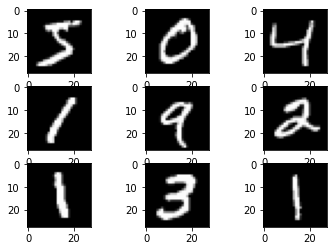

In [3]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

# *Explanation of above code:*

***Firstly, the MNIST dataset is present in the datasets of TENSORFLOW. We have to import the dataset from tensorflow.keras.datasets.***

***Now, we need to import pyplot from the MATPLOTLIB library as we will retreive some images from the dataset and plot it on a map.***

###### ***Now load the MNIST dataset into two variables (trainx, trainy) and (testx, testy).***
###### ***The dataset contains predefined train and test split as: 60000 training and 10000 test images so we dont need to specify it exclusively.***
###### ***Now, take a loop for 9 iterations and print 9 images of the dataset into subplots of a cmap by setting each size as 330px.***
###### ***Print the obtained result using plt.show().***
###### ***We can see that the dataset contains handwritten digits.***

### ***Now, Using the K Nearest Neighbour Classifier I am trying to train my code for 60000 images and test it on 10000 images as follows:***

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras import *

def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

def diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

def performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

def run_test():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    scores, histories = evaluate_model(trainX, trainY)
    diagnostics(histories)
    performance(scores)

## Explanation of the above code:

***Firstly import the MNIST dataset form tensorflow.keras.datasets and also import the KNN classifier from the sklearn.model_selecion.
Also import pylot from matplotlib and other functions such as mean, variance, etc from numpy library and  instead of importing every required library we can just put import tensorflow.keras.*.***

***Define a fucntion load_dataset() to load the dataset into (trainx, trainy), (testx, testy). we convert the variables into categorical using fucntion To_categorical().***

***The prep_pixels() function takes in two arrays, train and test, and applies normalization to them. It converts to float32 to have decimal point values. We then divide them by 255.0 to make the pixels into 0 and 1.***

***The define model() function creates a convolutional neural network as our dataset contains images.
The fucntions Conv2D(), MaxPooling(), Flatten(), etc are a bunch of optimization functions applied because of the huge dataset we have to understand what these functions do in detail refer https://keras.io/guides/***

***The evaluate_model() function is nothing but our k-fold cross validation. we perform k-fold cross validation on our data to see if our model correctly predicts the class label. We are doing the cross validation for 5 folds and for each and every fold, we shuffle the data using the shuffle parameter to increase the accuracy of our model.. We store the obtain 5 accuracies in scores variable.***

***Now, the Diagonistics() function displays the entropy and accuracy of our model. We plot the both cross entropy loss and classification accuracy using pyplot.***

***Now, in the Performance() function, we find the mean, standard deviation and the accuracies of 5 folds using a box plot.***

***Finally, the run_test() function has all the other function calls in it. so, if we call the run_test() function all the functions run and yeild a result.***

**We can see that our model is able to acheive 98.643% accuracy.**

> 98.500
> 98.692
> 98.550
> 98.825
> 98.650


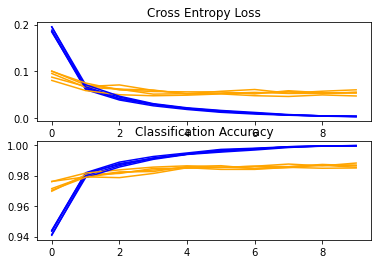

Accuracy: mean=98.643 std=0.114, n=5


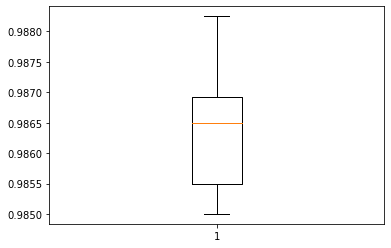

In [2]:
run_test()